In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv("bank-full.csv" , delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
job = bank.groupby("job" , as_index=False).agg({"marital" : "count"})
job = job.sort_values("marital")
job = job[job["job"].ne("unknown")]
job

,job,marital
8,student,938
3,housemaid,1240
10,unemployed,1303
2,entrepreneur,1487
6,self-employed,1579
5,retired,2264
7,services,4154
0,admin.,5171
9,technician,7597
4,management,9458


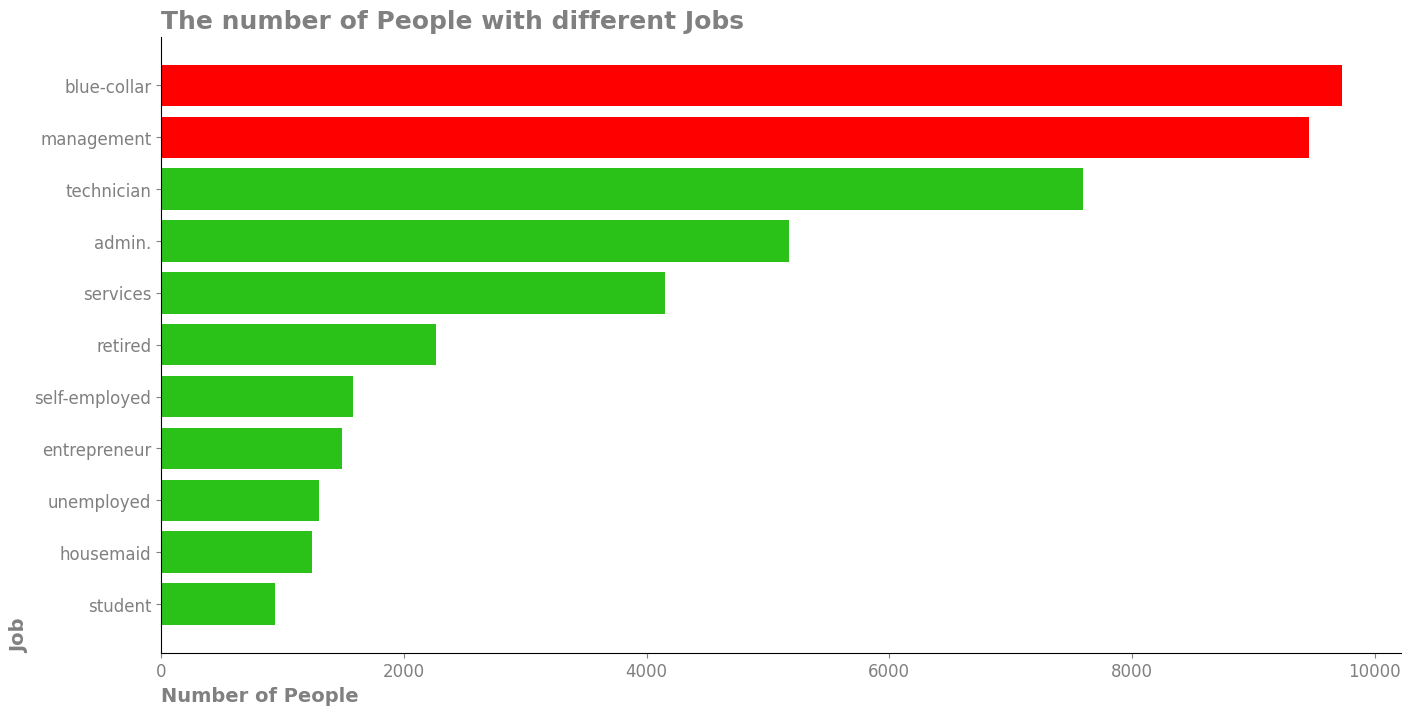

In [6]:
fig , ax = plt.subplots(figsize =(16,8))
ax.barh(job["job"] , job["marital"] ,
        color = np.where(job["marital"].gt(8000) , "red" , "#2ac119"))
ax.set_title("The number of People with different Jobs" , color = "gray" , weight = "bold" , loc = "left" , fontsize = 18)
ax.set_xlabel("Number of People" , color = "gray" , fontsize = 14 , weight = "bold" , loc="left")
ax.set_ylabel("Job" , color = "gray" , fontsize = 14 , weight = "bold" , loc="bottom")
ax.spines[["right" , "top"]].set_visible(False)
ax.tick_params(axis = "x" , colors = "gray", labelsize="large")
ax.tick_params(axis = "y" , colors = "gray", labelsize="large")
plt.show()

# People who have blue-collar and management jobs are the most members of this bank

In [7]:
situatin = bank.groupby("marital" , as_index=False).agg({"education" : "count"})
situatin = situatin.sort_values("education")
situatin

,marital,education
0,divorced,5207
2,single,12790
1,married,27214


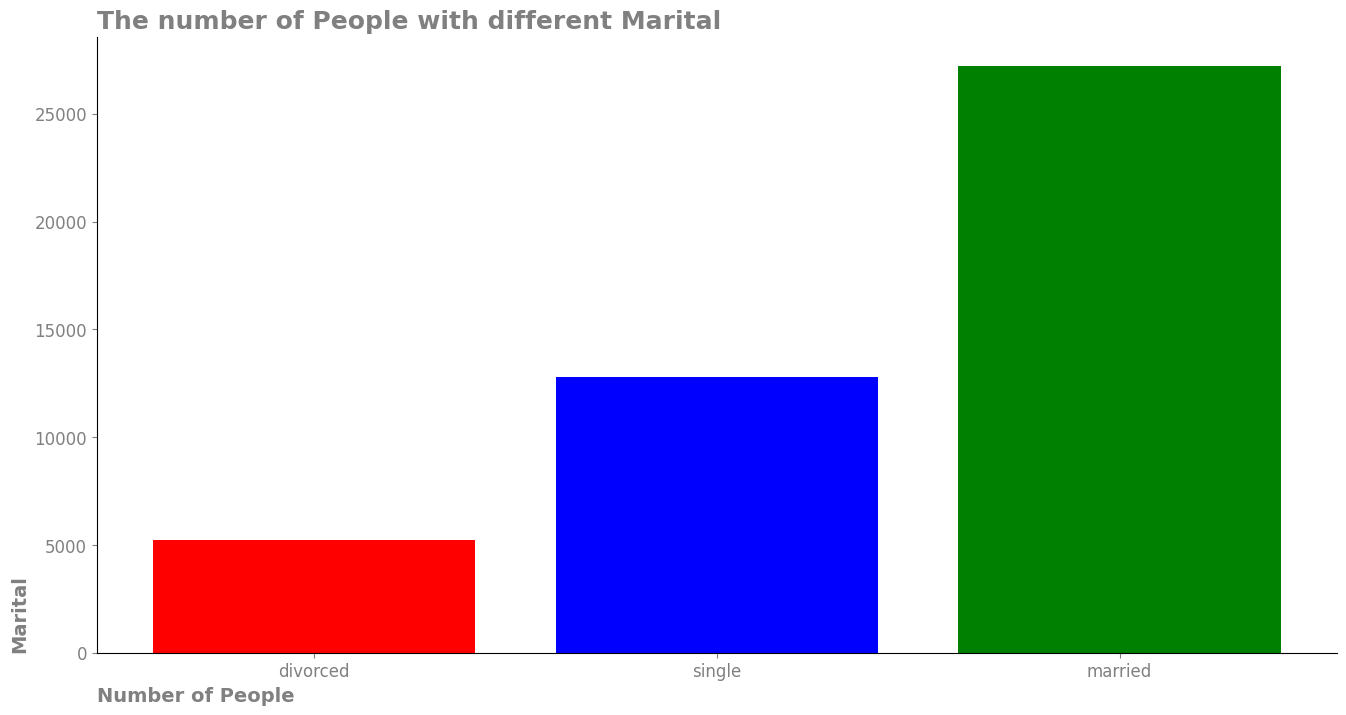

In [8]:
fig , ax = plt.subplots(figsize =(16,8))
color = ["red" , "blue" , "green"]
ax.bar(situatin["marital"] , situatin["education"]  , color =color)
ax.set_title("The number of People with different Marital" , color = "gray" , weight = "bold" , loc = "left" , fontsize = 18)
ax.set_xlabel("Number of People" , color = "gray" , fontsize = 14 , weight = "bold" , loc="left")
ax.set_ylabel("Marital" , color = "gray" , fontsize = 14 , weight = "bold" , loc="bottom")
ax.spines[["right" , "top"]].set_visible(False)
ax.tick_params(axis = "x" , colors = "gray", labelsize="large")
ax.tick_params(axis = "y" , colors = "gray", labelsize="large")
plt.show()

In [9]:
bank["default"].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

# Almost 98% of People do not have default Credit

In [10]:
bank["housing"].value_counts(normalize=True)*100

housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64

In [11]:
bank["loan"].value_counts(normalize=True)*100

loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64

# The interesting thing about this bank is that almost 55% of people have taken a home loan, but only 16% of people have taken a personal loan.
# This shows that this bank is probably for buying houses

In [12]:
x = bank.drop("y" , axis = 1)
y = bank["y"].map({"yes" : 1 , "no" : 0})

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2)

In [14]:
x_train_cat = x_train[["job" , "marital" , "education" , "default" , "housing" , "loan" , "contact" , "month" , "poutcome"]]
x_train_nom = x_train[["age" , "balance" , "day" , "duration" , "campaign" , "pdays" , "previous"]]

In [15]:
x_test_cat = x_test[["job" , "marital" , "education" , "default" , "housing" , "loan" , "contact" , "month" , "poutcome"]]
x_test_nom = x_test[["age" , "balance" , "day" , "duration" , "campaign" , "pdays" , "previous"]]

In [16]:
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
ohe = OneHotEncoder(handle_unknown="ignore" , dtype="int" , sparse_output=False).set_output(transform="pandas")
x_train_cat = ohe.fit_transform(x_train_cat)

In [17]:
mmn = MinMaxScaler(feature_range=(0,1)).set_output(transform="pandas")
x_train_nom = mmn.fit_transform(x_train_nom)

In [18]:
x_train_cat.shape , x_train_nom.shape

((36168, 44), (36168, 7))

In [19]:
x_train_final = pd.concat([x_train_cat , x_train_nom] , axis = 1)
x_train_final

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
25969,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.493506,0.072803,0.600000,0.039680,0.016129,0.000000,0.000000
23532,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.233766,0.078786,0.900000,0.023190,0.193548,0.000000,0.000000
25140,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.389610,0.062998,0.566667,0.019583,0.032258,0.000000,0.000000
10451,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.272727,0.076907,0.366667,0.059778,0.016129,0.000000,0.000000
5710,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.363636,0.071251,0.833333,0.034785,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30631,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.168831,0.089154,0.166667,0.035043,0.000000,0.315367,0.007273
25748,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.155844,0.135711,0.600000,0.087864,0.000000,0.000000,0.000000
37635,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0.363636,0.074773,0.433333,0.036331,0.000000,0.397936,0.007273
30327,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.129870,0.072949,0.133333,0.012368,0.000000,0.000000,0.000000


In [20]:
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
ohe = OneHotEncoder(handle_unknown="ignore" , dtype="int" , sparse_output=False).set_output(transform="pandas")
x_test_cat = ohe.fit_transform(x_test_cat)

In [21]:
mmn = MinMaxScaler(feature_range=(0,1)).set_output(transform="pandas")
x_test_nom = mmn.fit_transform(x_test_nom)

In [22]:
x_test_final = pd.concat([x_test_cat , x_test_nom] , axis = 1)
x_test_final

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
33140,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.315789,0.101429,0.633333,0.071980,0.000000,0.000000,0.000000
36558,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.328947,0.103406,0.366667,0.011793,0.000000,0.000000,0.000000
43640,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0.355263,0.066457,0.166667,0.050020,0.000000,0.070618,0.098039
23621,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.157895,0.054956,0.900000,0.003660,0.245614,0.000000,0.000000
8415,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.460526,0.054956,0.066667,0.013827,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.381579,0.064013,0.166667,0.046157,0.035088,0.000000,0.000000
23491,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.434211,0.057975,0.900000,0.033550,0.052632,0.000000,0.000000
15295,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.421053,0.065702,0.566667,0.010777,0.052632,0.000000,0.000000
20743,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.263158,0.565927,0.400000,0.050224,0.017544,0.000000,0.000000


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
params_reg = {
    "penalty" : ["l1" , "l2" , "elasticnet"],
    "C" : [0.1,1,10,100,1000] ,
    "solver" : ["lbfgs" , "liblinear" , "saga"]
}

In [24]:
##grid = GridSearchCV(estimator= model_reg , param_grid= params_reg , cv=5)
##grid_result_reg = grid.fit(x_train_final , y_train)

In [25]:
##best_params_reg = grid_result_reg.best_params_
##best_params_reg

In [26]:
log_reg = LogisticRegression(random_state=0 , C=100 , penalty="l1" , solver="liblinear")
log_reg.fit(x_train_final , y_train)

LogisticRegression(C=100, penalty='l1', random_state=0, solver='liblinear')

In [27]:
y_pred_train_reg = log_reg.predict(x_train_final)
y_pred_test_reg = log_reg.predict(x_test_final)

In [28]:
from sklearn.metrics import accuracy_score
acc_train_reg = accuracy_score(y_train , y_pred_train_reg)
acc_test_reg = accuracy_score(y_test , y_pred_test_reg)
acc_train_reg , acc_test_reg

(0.9025105065251051, 0.8980426849496849)

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model_svm = SVC()
params_svm = {
    "kernel" : ["poly" ,"rbf"],
    "C" : [0.1,1,10,100,1000] ,
    "gamma" : ["scale" , "auto"]
}

In [30]:
##grid_svm = GridSearchCV(estimator= model_svm , param_grid= params_svm , cv=5)
##grid_result_svm = grid_svm.fit(x_train_final , y_train)

In [31]:
##best_params_svm = grid_result_svm.best_params_
##best_params_svm

In [32]:
svm = SVC(kernel="poly" , C=100 , gamma="auto")
svm.fit(x_train_final , y_train)

SVC(C=100, gamma='auto', kernel='poly')

In [33]:
y_pred_train_svm = svm.predict(x_train_final)
y_pred_test_svm = svm.predict(x_test_final)

In [34]:
acc_train_svm = accuracy_score(y_train , y_pred_train_svm)
acc_test_svm = accuracy_score(y_test , y_pred_test_svm)
acc_train_svm , acc_test_svm

(0.8967595664675957, 0.8925135463894726)

In [36]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
params_xg = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 4, 5],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0] 
}

In [37]:
grid_xg = GridSearchCV(estimator= model_xg , param_grid= params_xg , cv=5)
grid_result_xg = grid_xg.fit(x_train_final , y_train)

In [38]:
best_params_xg = grid_result_xg.best_params_
best_params_xg

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.8}

In [39]:
xg_boost = XGBClassifier(colsample_bytree = 1 , learning_rate = 0.1 , max_depth = 4 , n_estimators = 200 , subsample = 0.8)
xg_boost.fit(x_train_final , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_train_xg = xg_boost.predict(x_train_final)
y_pred_test_xg = xg_boost.predict(x_test_final)

In [41]:
acc_train_xg = accuracy_score(y_train , y_pred_train_xg)
acc_test_xg = accuracy_score(y_test , y_pred_test_xg)
acc_train_xg , acc_test_xg

(0.9255695642556956, 0.9020236647130377)